# **LIBRARY**

Pertama, disini akan dilakukan import library yang akan dilakukan selama proses pengolahan dataset spotify_song.csv ini


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# **LOAD DATASET**

Kemudian, unduh file zip pada https://www.dropbox.com/sh/qj0ueimxot3ltbf/AACzMOHv7sZCJsj3ErjtOG7ya?dl=1

In [2]:
!wget https://www.dropbox.com/sh/qj0ueimxot3ltbf/AACzMOHv7sZCJsj3ErjtOG7ya?dl=1 -O spotify_song.zip

--2025-01-02 08:26:35--  https://www.dropbox.com/sh/qj0ueimxot3ltbf/AACzMOHv7sZCJsj3ErjtOG7ya?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fo/gw3fns50k4c06ljfi01r9/AIOARdAHIs2pK8UfTEBooBs?rlkey=vouxv2k7qt2kqjmeg11793eai&dl=1 [following]
--2025-01-02 08:26:35--  https://www.dropbox.com/scl/fo/gw3fns50k4c06ljfi01r9/AIOARdAHIs2pK8UfTEBooBs?rlkey=vouxv2k7qt2kqjmeg11793eai&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3f3f5430e555bccd5b4eada7c5.dl.dropboxusercontent.com/zip_download_get/CEySHZLlHn4NQZRLaQc00h6JOXfHxwGXM8IysNgRjGDK6KpI0Oq4HakoZpRExvcVifsx-7bXs8NtBczy9Jmmwd8QQ-1kGGGBZ8w9gnFW5zH4Kg# [following]
--2025-01-02 08:26:36--  https://uc3f3f5430e555bccd5b4eada7c5.dl.dropboxusercontent.com/zi

Unzip 'spotify_song.zip' yang telah di unduh sebelumnya

In [3]:
!unzip spotify_song.zip
df = pd.read_csv('spotify_songs.csv')

Archive:  spotify_song.zip
mapname:  conversion of  failed
 extracting: spotify_songs.csv       


# **EDA (Exploratory Data Analysis)**

Berikut ini akan ditampilkan 5 data teratas dari dataset spotify_songs.csv

In [4]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


Kemudian akan ditampilkan tipe data dari tiap kolomnya

In [5]:
df.dtypes

,0
track_id,object
track_name,object
track_artist,object
track_popularity,int64
track_album_id,object
track_album_name,object
track_album_release_date,object
playlist_name,object
playlist_id,object
playlist_genre,object


Berikut ini akan ditampilkan ringkasan statistik dari kolom-kolom numerik dalam DataFrame


In [6]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


# **PRE-PROCESSING**

Selanjutnya, akan dilakukan pengecekan untuk menghitung jumlah nilai yang hilang (missing values) di setiap kolomnya. Bisa kita lihat, bahwa terdapat missing value pada kolom track_name, track_artist dan track_album_name

In [7]:
df.isna().sum()

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


Untuk ketiga kolom yang terdapat missing value, akan dilakukan penyelesaian dengan mengisi nilai yang kosong (missing values) di ketiga kolom tersebut dengan nilai yang paling sering muncul (modus) pada masing-masing kolomnya

In [8]:
for column in ['track_name', 'track_artist', 'track_album_name']:
    most_frequent_value = df[column].mode()[0]
    df[column].fillna(most_frequent_value, inplace=True)

<ipython-input-8-dee7d4bb0fcd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(most_frequent_value, inplace=True)


Setelah dilakukan penyelesaian masalah pada kolom yang terdapat missing value,berikut ini akan dicek kembali apakah masih terdapat missing value atau tidak pada setiap kolomnya. Dan bisa kita lihat, bahwa untuk kolom yang terdapat missing value sudah teratasi dengan baik

In [9]:
df.isna().sum()

,0
track_id,0
track_name,0
track_artist,0
track_popularity,0
track_album_id,0
track_album_name,0
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


Berikut ini akan dilakukan proses konversi kolom track_album_release_date menjadi objek datetime dan menangani kasus di mana hanya tahun yang tercatat dengan mengisi nilai yang hilang (NaT) dengan tahun tersebut.

In [10]:
# Convert 'track_album_release_date' to datetime objects
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce', format='%Y-%m-%d')

# Handle cases where only the year is provided
df['track_album_release_date'] = df['track_album_release_date'].fillna(pd.to_datetime(df['track_album_release_date'].astype(str).str.extract(r'(\d{4})')[0], format='%Y', errors='coerce'))

In [11]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


# **ANALISIS PADA KOLOM KATEGORIKAL**

Berikut ini akan ditampilkan distribusi dari 'playlist_genre'. Dimana bisa kita lihat dibawah ini, bahwa gende EDM merupakan genre yang paling banyak diminati pada dataset ini. Kemudian diikuti dengan genre RAP, POP, R&B, LATIN, serta genre yang paling sedikit diminati pada dataset ini yaitu ROCK

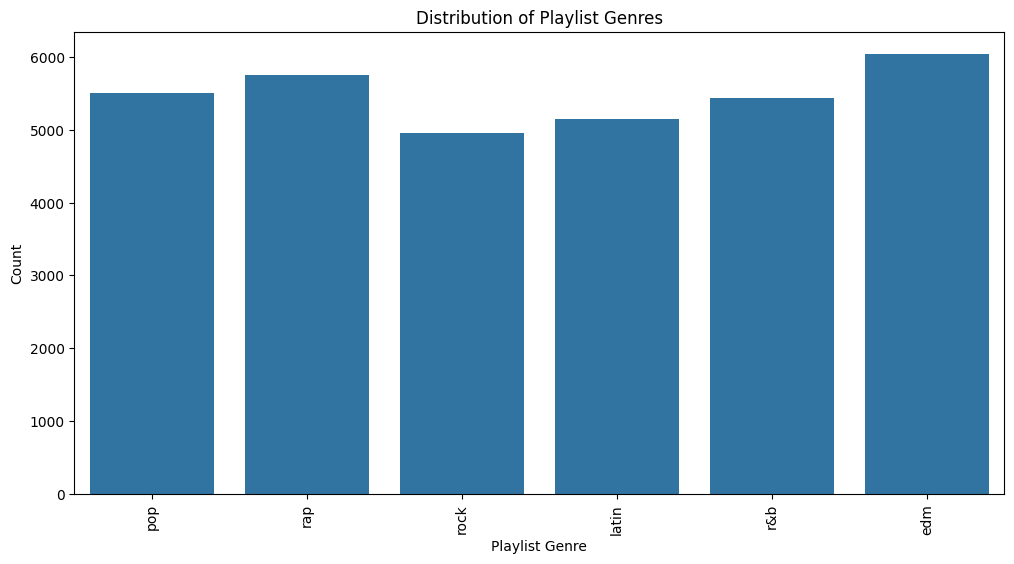

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='playlist_genre', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.title('Distribution of Playlist Genres')
plt.xlabel('Playlist Genre')
plt.ylabel('Count')
plt.show()

Dibawah ini adalah 10 artis yang paling produktif berdasarkan jumlah lagu yang dimiliki

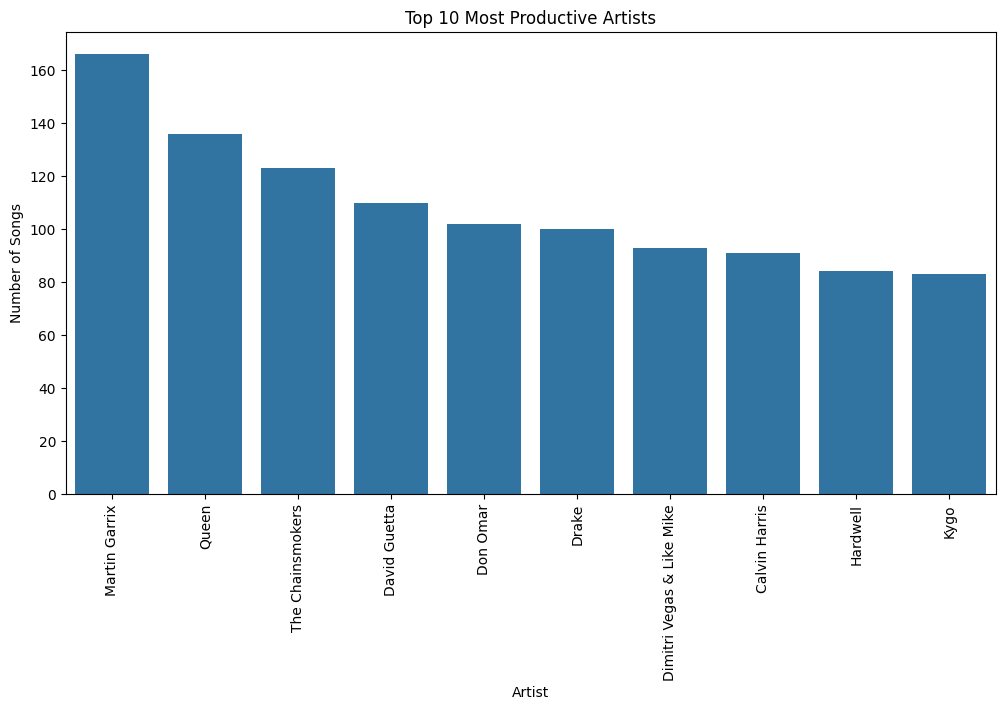

In [13]:
# Create a plot showing the distribution of artists
plt.figure(figsize=(12, 6))
artist_counts = df['track_artist'].value_counts().head(10)  # Get top 10 artists
sns.barplot(x=artist_counts.index, y=artist_counts.values)
plt.xticks(rotation=90)
plt.title('Top 10 Most Productive Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.show()

Berikut ini adalah rincian lebih jelasnya. Dimana untuk artis dengan lagu terbanyak ada pada Martin Garrix, Queen, The Chainsmokers dan lain lain.

In [14]:
df['track_artist'].value_counts()

,count
track_artist,
Martin Garrix,166
Queen,136
The Chainsmokers,123
David Guetta,110
Don Omar,102
...,...
Underworld,1
The Witches,1
Tess Parks,1


Berikut ini akan dilakukan analisis populer berdasarkan artis. Artis dengan rata-rata popularitas tertinggi menunjukkan artis yang sering menghasilkan lagu populer.

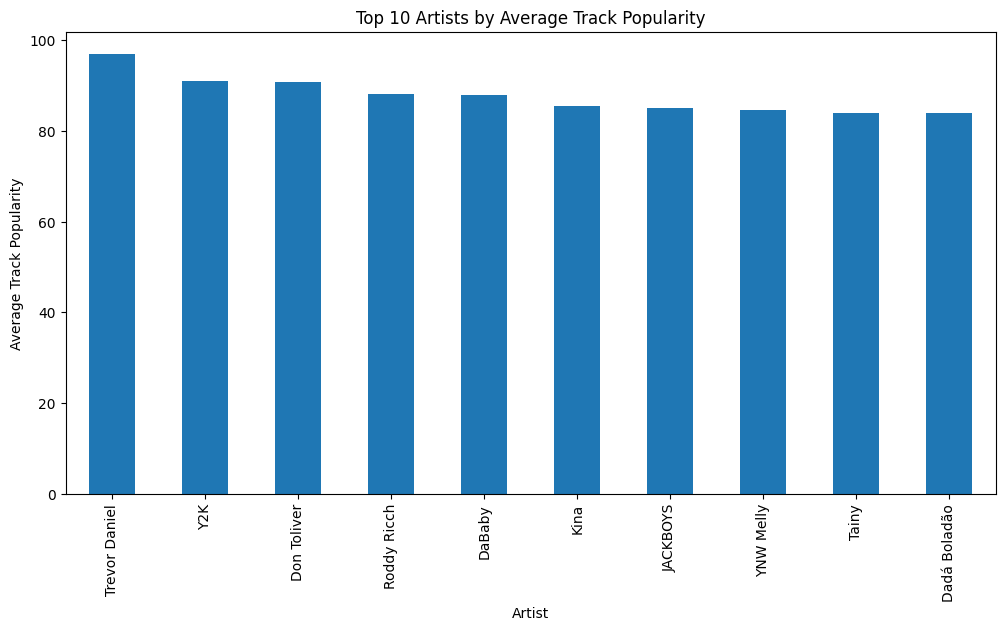

In [15]:
# Group data by artist and calculate the mean track popularity for each artist
artist_popularity = df.groupby('track_artist')['track_popularity'].mean()

# Sort artists by mean track popularity in descending order
artist_popularity = artist_popularity.sort_values(ascending=False)

# Plot the top 10 artists by track popularity
plt.figure(figsize=(12, 6))
artist_popularity.head(10).plot(kind='bar')
plt.title('Top 10 Artists by Average Track Popularity')
plt.xlabel('Artist')
plt.ylabel('Average Track Popularity')
plt.show()

Berdasarkan analisis diatas, bisa disimpulkan bahwa :

1.   Distribusi genre memberikan wawasan tentang genre mana yang lebih banyak dikonsumsi oleh audiens dan genre yang kurang populer atau lebih niche. Hal ini bisa menunjukkan preferensi audiens terhadap genre tertentu.
2.   Produktivitas vs Popularitas: Dari analisis berdasarkan jumlah lagu, bisa dilihat artis yang lebih produktif dan aktif merilis lagu. Namun, popularitas tidak selalu sebanding dengan jumlah lagu. Artis dengan lebih sedikit lagu namun dengan popularitas tinggi dapat menunjukkan bahwa kualitas dan daya tarik lagu mereka lebih besar.



# **ANALISIS BERDASARKAN WAKTU**

Berikut ini akan dilakukan analisis tren lagu berdasarkan tahun rilis. Bisa dilihat bahwa lagu terbaru cenderung memiliki popularitas yang lebih tinggi.

<Axes: xlabel='release_year'>

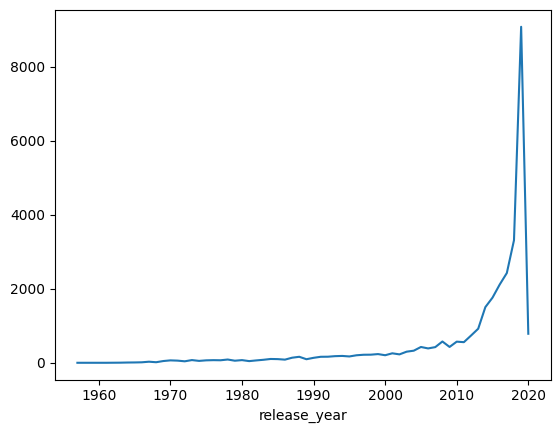

In [16]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])
df['release_year'] = df['track_album_release_date'].dt.year
df['release_year'].value_counts().sort_index().plot(kind='line')

Melihat bagaimana rata-rata popularitas track lagu berubah seiring waktu

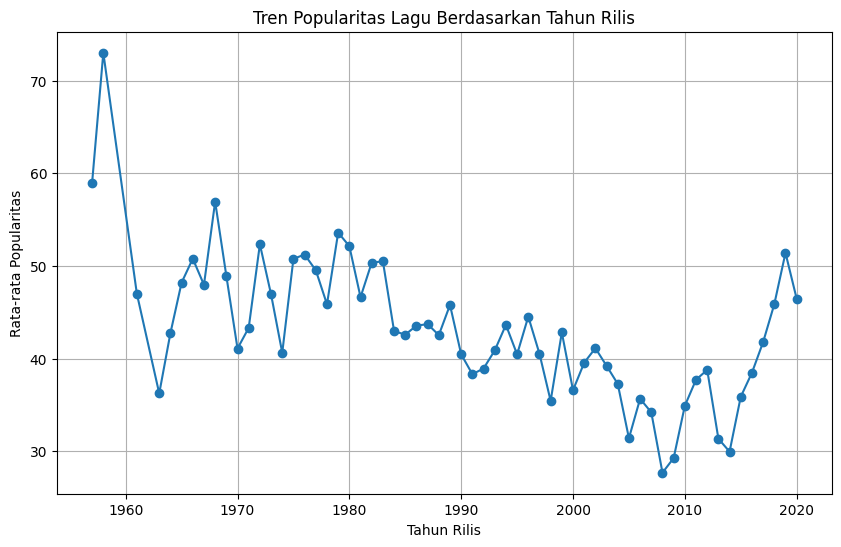

In [31]:
# Konversi tanggal rilis menjadi tipe datetime
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Ekstrak tahun dari tanggal rilis
df['release_year'] = df['track_album_release_date'].dt.year

# Tren popularitas berdasarkan tahun
popularity_trend = df.groupby('release_year')['track_popularity'].mean()

# Visualisasi
plt.figure(figsize=(10, 6))
popularity_trend.plot(marker='o')
plt.title('Tren Popularitas Lagu Berdasarkan Tahun Rilis')
plt.xlabel('Tahun Rilis')
plt.ylabel('Rata-rata Popularitas')
plt.grid()
plt.show()


# **ANALISIS BERDASARKAN DURASI**

Pada pola kali ini. akan dilakukan analisis berdasarkan durasi lagunya Lagu dengan durasi 2-4 menit cenderung lebih populer, karena sesuai dengan tren industri musik modern.

<Axes: >

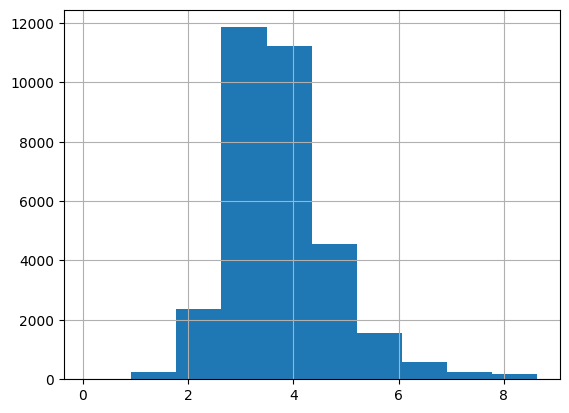

In [17]:
df['duration_min'] = df['duration_ms'] / 60000
df['duration_min'].hist()

# **ANALISIS BERDASARKAN PLAYLIST**

Pada analisis kali ini, akan dilakukan analisis berdasarkan playlist. Bisa dilihat bahwa playlist yang paling populer ada pada genre Latin dan R&B

In [18]:
# Group by playlist name and genre, then calculate the mean track popularity
playlist_genre_popularity = df.groupby(['playlist_name', 'playlist_genre'])['track_popularity'].mean().reset_index()

# Sort by track popularity in descending order
playlist_genre_popularity = playlist_genre_popularity.sort_values('track_popularity', ascending=False)

playlist_genre_popularity

,playlist_name,playlist_genre,track_popularity
8,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,latin,83.912371
9,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,r&b,80.528302
313,RapCaviar,rap,79.700000
239,Most Popular 2020 TOP 50,r&b,79.333333
283,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,pop,79.130000
...,...,...,...
425,Vocal House,edm,8.030612
125,Electro/Progressive/Club House,edm,7.800000
163,Gospel Neo Soul,r&b,5.240000
215,Latin Hip Hop/Freestyle,latin,4.080000


# **ANALISIS BERDASARKAN GENRE**

Untuk mengetahui popularitas rata-rata dari setiap genre yang tersedia dalam dataset

<ipython-input-19-9c6d19b09389>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette="viridis")


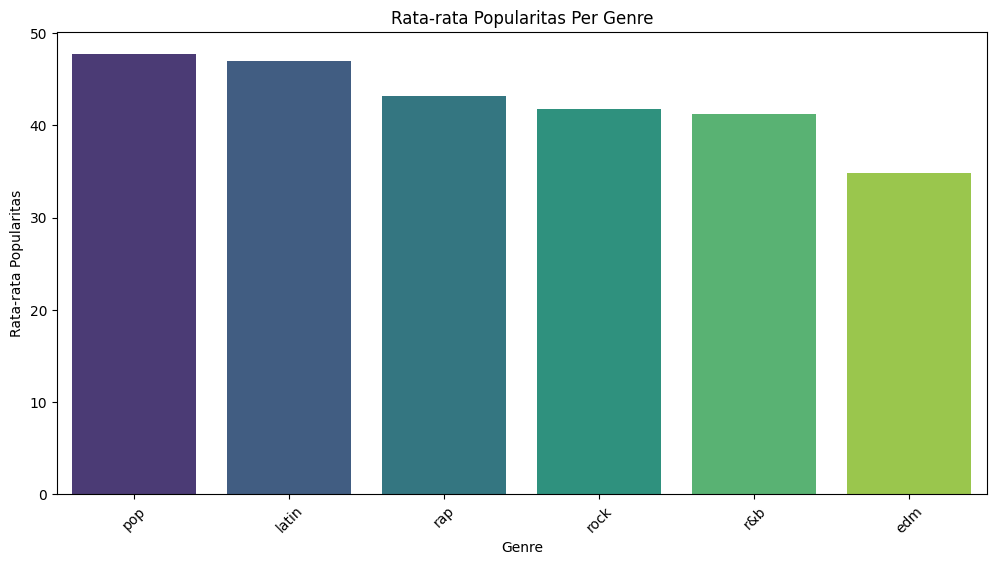

In [19]:
# Rata-rata popularitas per genre
genre_popularity = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette="viridis")
plt.title('Rata-rata Popularitas Per Genre')
plt.xlabel('Genre')
plt.ylabel('Rata-rata Popularitas')
plt.xticks(rotation=45)
plt.show()


Menganalisis Subgenre dengan rata-rata danceability tertinggi.

<ipython-input-30-fd96b85fca31>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subgenre_danceability.values, y=subgenre_danceability.index, palette="cool")


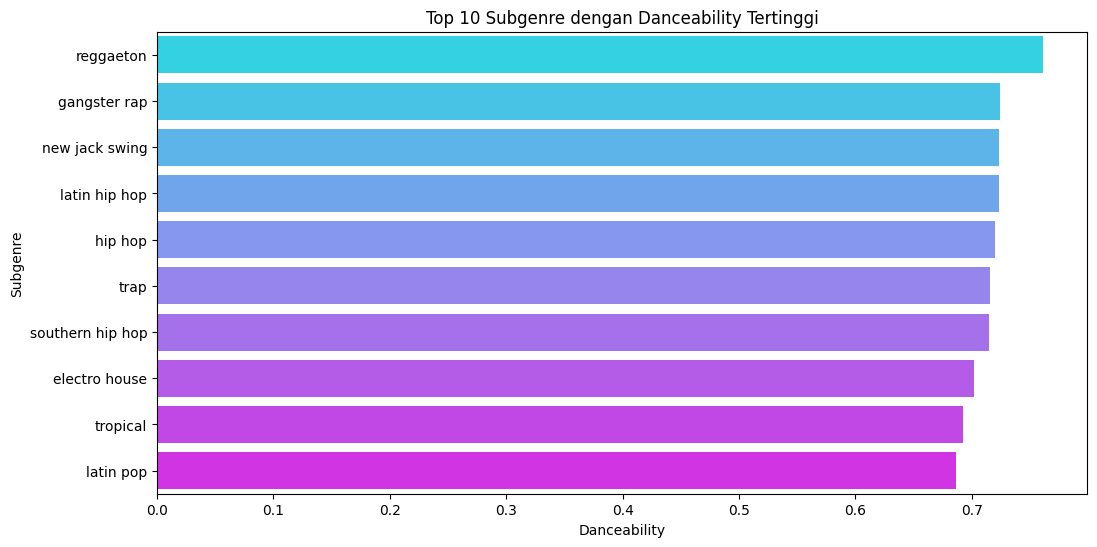

In [30]:
# Rata-rata danceability per subgenre
subgenre_danceability = df.groupby('playlist_subgenre')['danceability'].mean().sort_values(ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=subgenre_danceability.values, y=subgenre_danceability.index, palette="cool")
plt.title('Top 10 Subgenre dengan Danceability Tertinggi')
plt.xlabel('Danceability')
plt.ylabel('Subgenre')
plt.show()


# **ANALISIS BERDASARKAN TRACK**

Mengidentifikasi lagu-lagu yang memiliki popularitas tertinggi dalam dataset.

In [28]:
# Urutkan dataset berdasarkan track_popularity secara menurun
top_tracks = df.sort_values(by='track_popularity', ascending=False).head(10)

# Tampilkan informasi 10 lagu terpopuler
top_tracks_info = top_tracks[['track_name', 'track_popularity', 'track_album_name', 'track_album_release_date']]

# Tampilkan tabel dalam format rapi
print(top_tracks_info.to_string(index=False))
# Visualisasi 10 lagu terpopuler


     track_name  track_popularity                            track_album_name track_album_release_date
   Dance Monkey               100 Dance Monkey (Stripped Back) / Dance Monkey               2019-10-17
   Dance Monkey               100 Dance Monkey (Stripped Back) / Dance Monkey               2019-10-17
        ROXANNE                99                                     ROXANNE               2019-10-10
        ROXANNE                99                                     ROXANNE               2019-10-10
        ROXANNE                99                                     ROXANNE               2019-10-10
        ROXANNE                99                                     ROXANNE               2019-10-10
        Circles                98                        Hollywood's Bleeding               2019-09-06
Blinding Lights                98                             Blinding Lights               2019-11-29
        Circles                98                        Hollywood's Blee